In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import yaml
import spiir

In [3]:
config_path = "../config/sigmasq.yaml"
with open(config_path) as file:
    config = yaml.safe_load(file)
config

{'seed': 21,
 'distributions': [{'variable': 'mass_1',
   'distribution': 'normal',
   'loc': 7,
   'scale': 2},
  {'variable': 'mass_2', 'distribution': 'normal', 'loc': 6, 'scale': 1},
  {'variable': 'phase',
   'distribution': 'uniform',
   'low': 0.0,
   'high': 3.141592653589793},
  {'variable': 'chi_1',
   'distribution': 'uniform',
   'seed': 20,
   'low': 0.0,
   'high': 0.88},
  {'variable': 'chi_2', 'distribution': 'uniform', 'low': 0.0, 'high': 0.88},
  {'variable': 'theta_1', 'distribution': 'sin_angle', 'package': 'pycbc'},
  {'variable': 'theta_2', 'distribution': 'sin_angle', 'package': 'pycbc'},
  {'variable': 'theta_jn', 'distribution': 'sin_angle', 'package': 'pycbc'},
  {'variable': 'phi_12',
   'distribution': 'uniform',
   'seed': 20,
   'low': 0.0,
   'high': 3.141592653589793},
  {'variable': 'phi_jl',
   'distribution': 'uniform',
   'low': 0.0,
   'high': 3.141592653589793}],
 'transforms': [{'transform': 'abs',
   'package': 'numpy',
   'variables': 'mass_1'},

In [4]:
priors = spiir.distribution.JointDistribution.from_yaml(config_path)
priors

JointDistribution(
  distributions=(
    NumPyDistribution(variable='mass_1', distribution='normal', kwargs={'loc': 7, 'scale': 2}),
    NumPyDistribution(variable='mass_2', distribution='normal', kwargs={'loc': 6, 'scale': 1}),
    NumPyDistribution(variable='phase', distribution='uniform', kwargs={'low': 0.0, 'high': 3.141592653589793}),
    NumPyDistribution(variable='chi_1', distribution='uniform', kwargs={'low': 0.0, 'high': 0.88}),
    NumPyDistribution(variable='chi_2', distribution='uniform', kwargs={'low': 0.0, 'high': 0.88}),
    PyCBCDistribution(variable='theta_1', distribution='sin_angle', kwargs={}),
    PyCBCDistribution(variable='theta_2', distribution='sin_angle', kwargs={}),
    PyCBCDistribution(variable='theta_jn', distribution='sin_angle', kwargs={}),
    NumPyDistribution(variable='phi_12', distribution='uniform', kwargs={'low': 0.0, 'high': 3.141592653589793}),
    NumPyDistribution(variable='phi_jl', distribution='uniform', kwargs={'low': 0.0, 'high': 3.14159265

In [7]:
samples = priors.draw(1000)
samples

Simulating CBC inspiral waveforms to compute sigmasq: 100%|██████████| 1000/1000 [00:15<00:00, 66.25it/s]
Simulating CBC inspiral waveforms to compute sigmasq: 100%|██████████| 1000/1000 [00:15<00:00, 65.90it/s]
Simulating CBC inspiral waveforms to compute sigmasq: 100%|██████████| 1000/1000 [00:14<00:00, 70.28it/s]


,mass_1,mass_2,phase,chi_1,chi_2,theta_1,theta_2,theta_jn,phi_12,phi_jl,sigmasq
0,9.645066,7.322533,2.303263,0.713762,0.645173,1.071920,0.644732,1.015739,2.548125,2.303263,15.568885
1,7.270230,6.135115,0.033662,0.644257,0.009429,1.113046,0.954692,0.840175,2.299994,0.033662,14.316255
2,6.809350,5.904675,0.799615,0.853407,0.223982,2.250680,2.350588,2.199532,3.046657,0.799615,10.545369
3,7.079470,6.039735,2.755723,0.407261,0.771913,1.263328,2.689060,0.694476,1.453920,2.755723,16.567126
4,7.871792,6.435896,0.189990,0.548953,0.053219,2.523047,1.119349,2.376624,1.959758,0.189990,17.537189
...,...,...,...,...,...,...,...,...,...,...,...
995,11.161697,8.080848,1.251770,0.795121,0.350637,2.210806,2.156567,1.982702,2.838577,1.251770,14.786394
996,6.053134,5.526567,2.098389,0.370000,0.587785,1.815777,1.883623,2.281105,1.320898,2.098389,10.964183
997,6.925527,5.962763,2.569914,0.300253,0.719866,0.350952,1.145821,2.548928,1.071899,2.569914,17.984484
998,9.419789,7.209894,2.022161,0.580225,0.566433,2.119238,0.906225,1.146337,2.071399,2.022161,12.714164


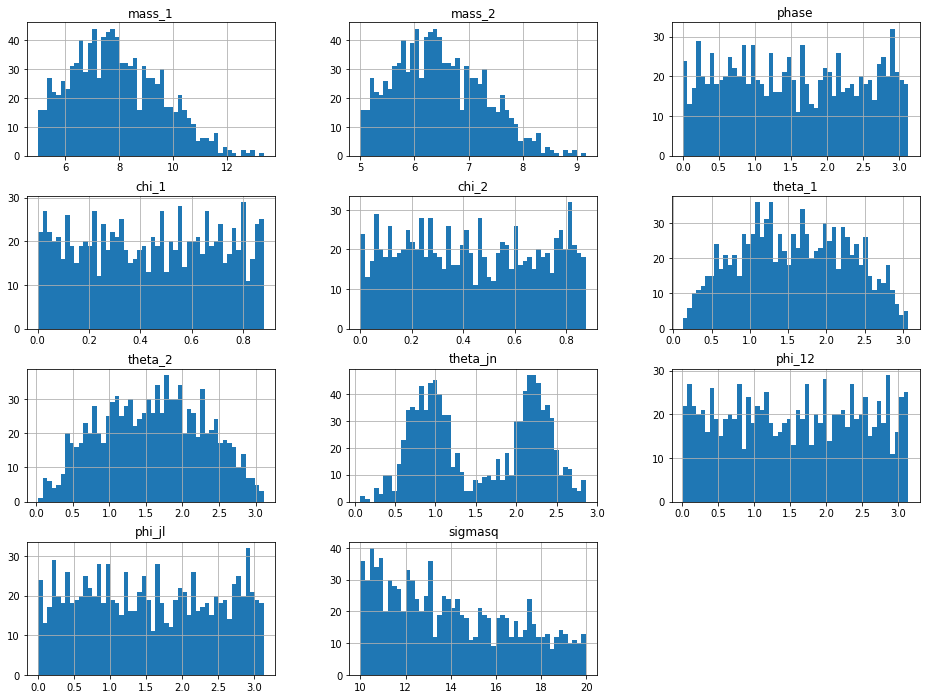

In [8]:
samples.hist(bins=50, figsize=(16,12));